In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df_train = pd.read_csv('titanic_train_cleaned_features.csv')
df_test = pd.read_csv('titanic_test_cleaned.csv')
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
family_size      int64
salutation       int64
dtype: object

In [64]:
df_train_features = df_train[['Pclass','Sex','Age','Parch','Fare','Embarked','salutation']]
df_train_labels = df_train[['Survived']]
df_test_features = df_test[['Pclass','Sex','Age','Parch','Fare','Embarked','salutation']]

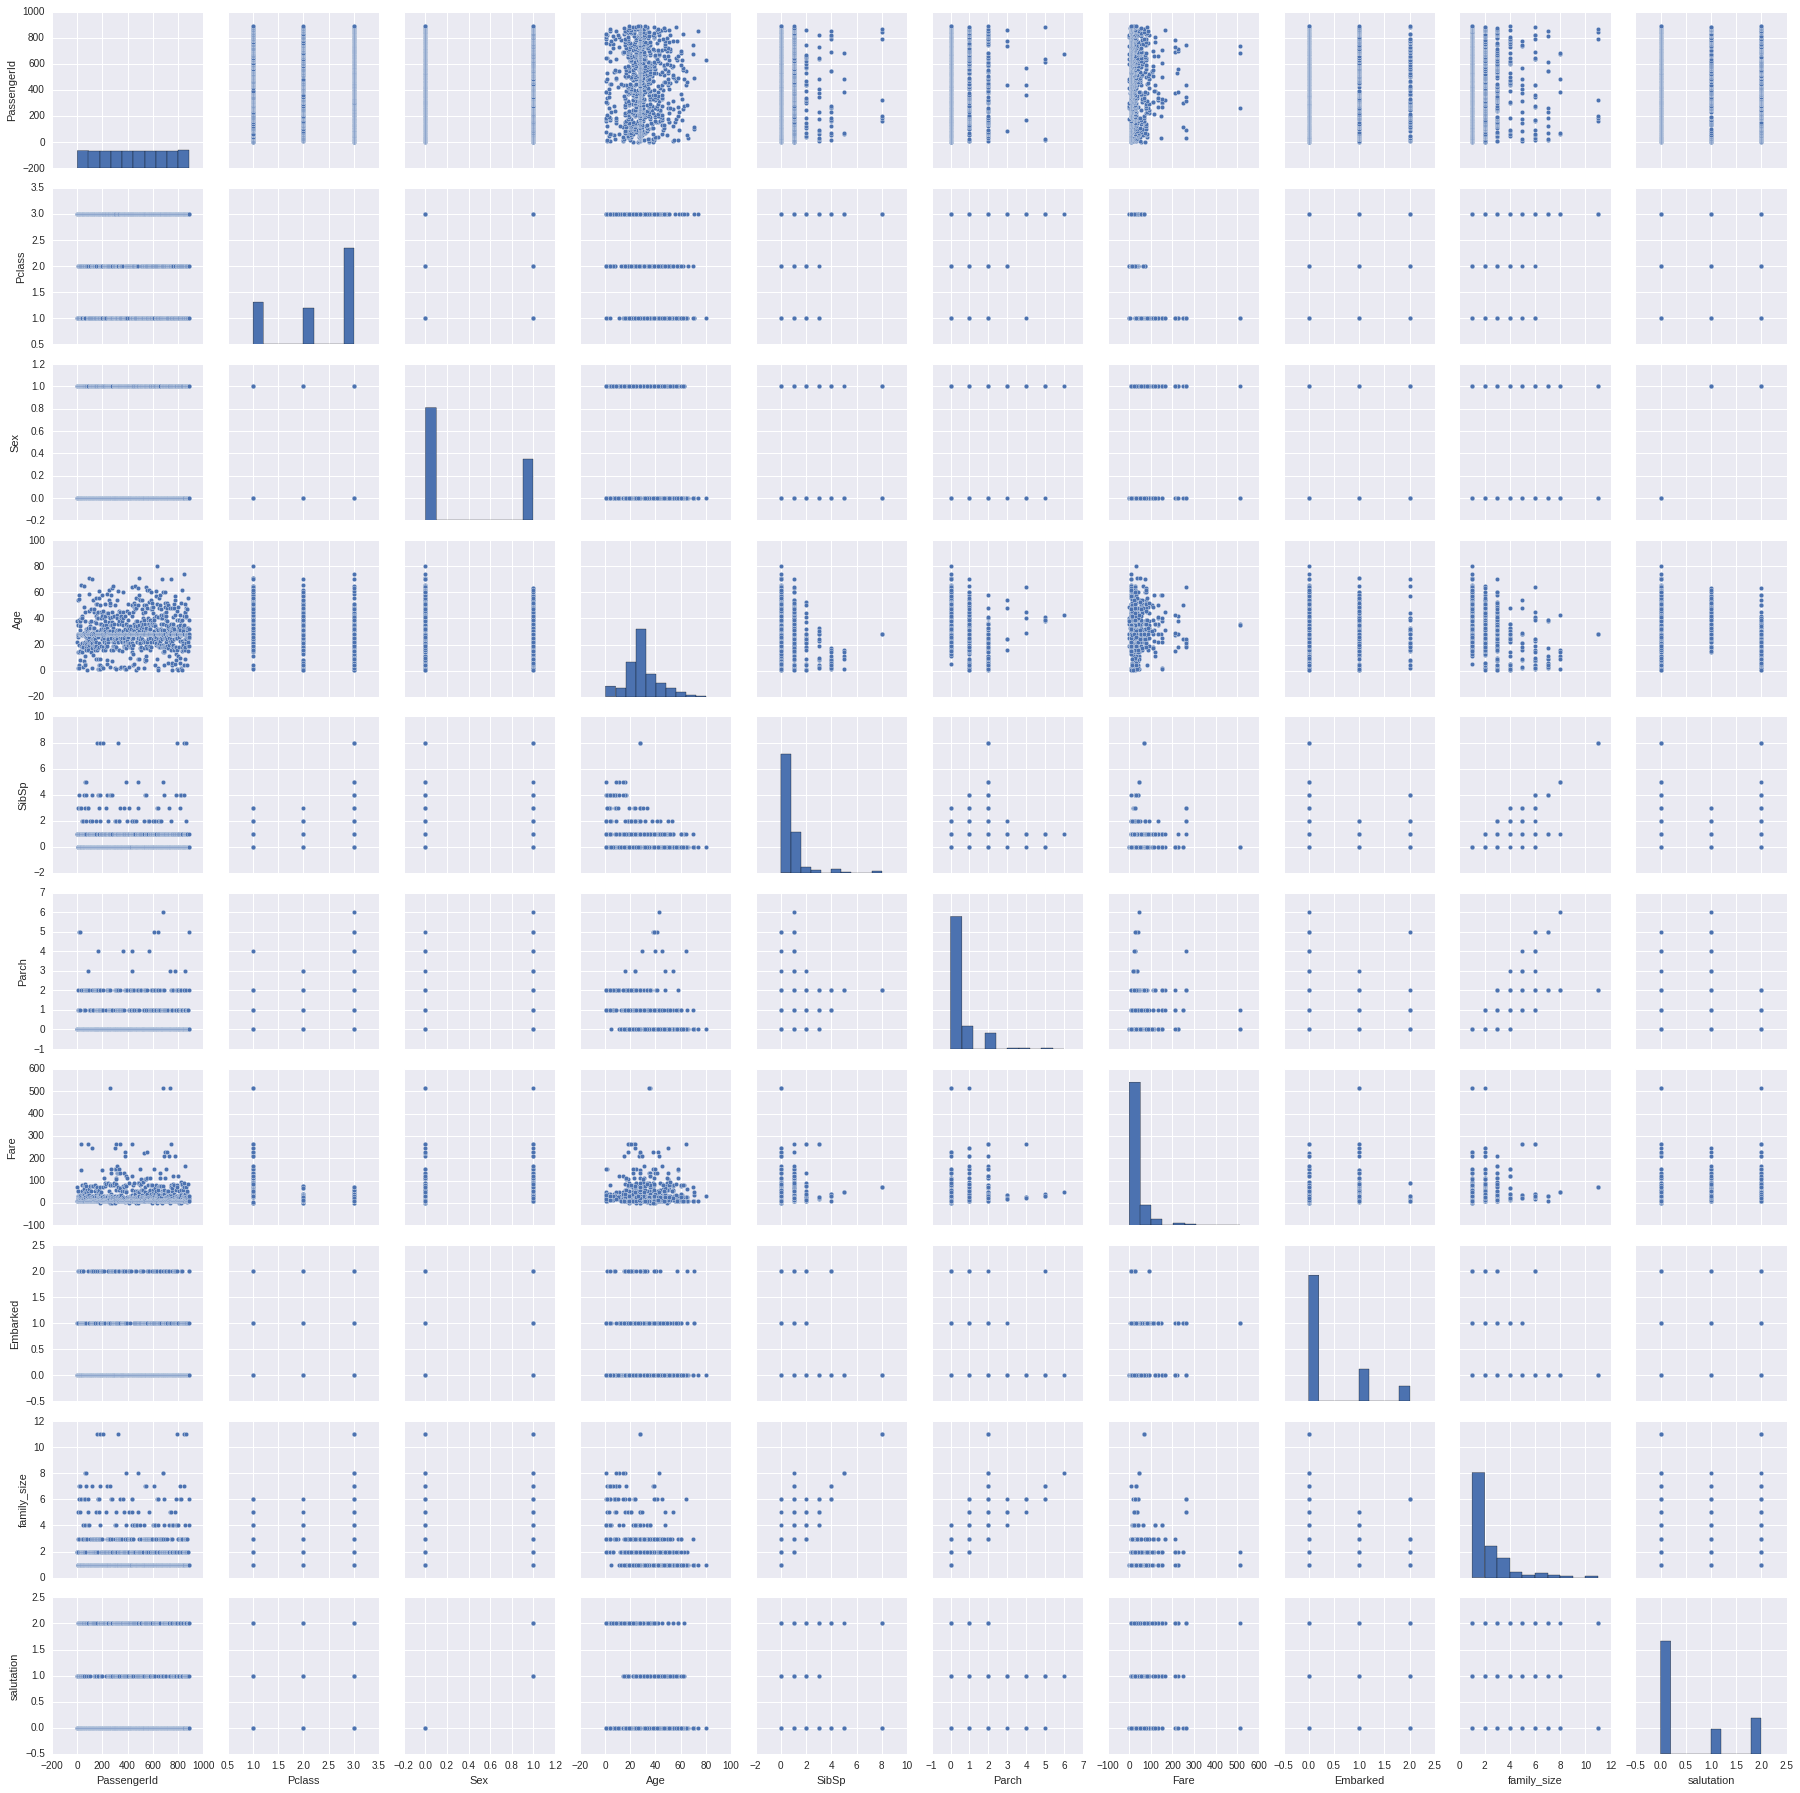

In [16]:
sns.pairplot(df_train_features)

In [14]:
df_train_labels['Survived'].unique()

array([0, 1])

In [53]:
import xgboost as xgb

In [62]:
gbm = xgb.XGBClassifier(max_depth=5, n_estimators=2000, learning_rate=0.01)

In [65]:
gbm.fit(df_train_features, df_train_labels)
scores = cross_validation.cross_val_score(clf, df_train_features, df_train_labels['Survived'], cv=5)
print scores

/home/vaibhav/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.81005587  0.81564246  0.83707865  0.80337079  0.86440678]


In [56]:
predictions = gbm.predict(df_test_features)

In [57]:
submission = pd.DataFrame({ 'PassengerId': df_test['PassengerId'],
                            'Survived': predictions })

In [58]:
submission.to_csv('submit.csv', index=False)

/home/vaibhav/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


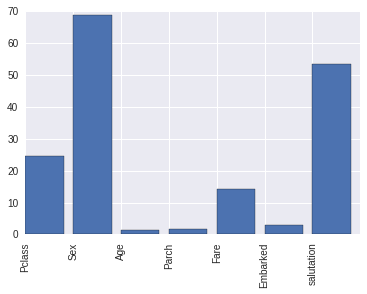

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
selector.fit(df_train_features, df_train_labels)
scores = -np.log10(selector.pvalues_)
plt.bar(range(7), scores)
plt.xticks(range(7),['Pclass','Sex','Age','Parch','Fare','Embarked','salutation'], rotation='vertical')
plt.show()

In [44]:
from sklearn import cross_validation
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=8, min_samples_split=60, min_samples_leaf=8, learning_rate=0.1)
scores = cross_validation.cross_val_score(clf, df_train_features, df_train_labels['Survived'], cv=5)
print scores


[ 0.82122905  0.82122905  0.8258427   0.80898876  0.8700565 ]


In [48]:
from sklearn import cross_validation
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=8, min_samples_split=60, min_samples_leaf=8, learning_rate=0.1)
scores = cross_validation.cross_val_score(clf, df_train_features, df_train_labels['Survived'], cv=5)
print scores


[ 0.81005587  0.81564246  0.83707865  0.80337079  0.86440678]


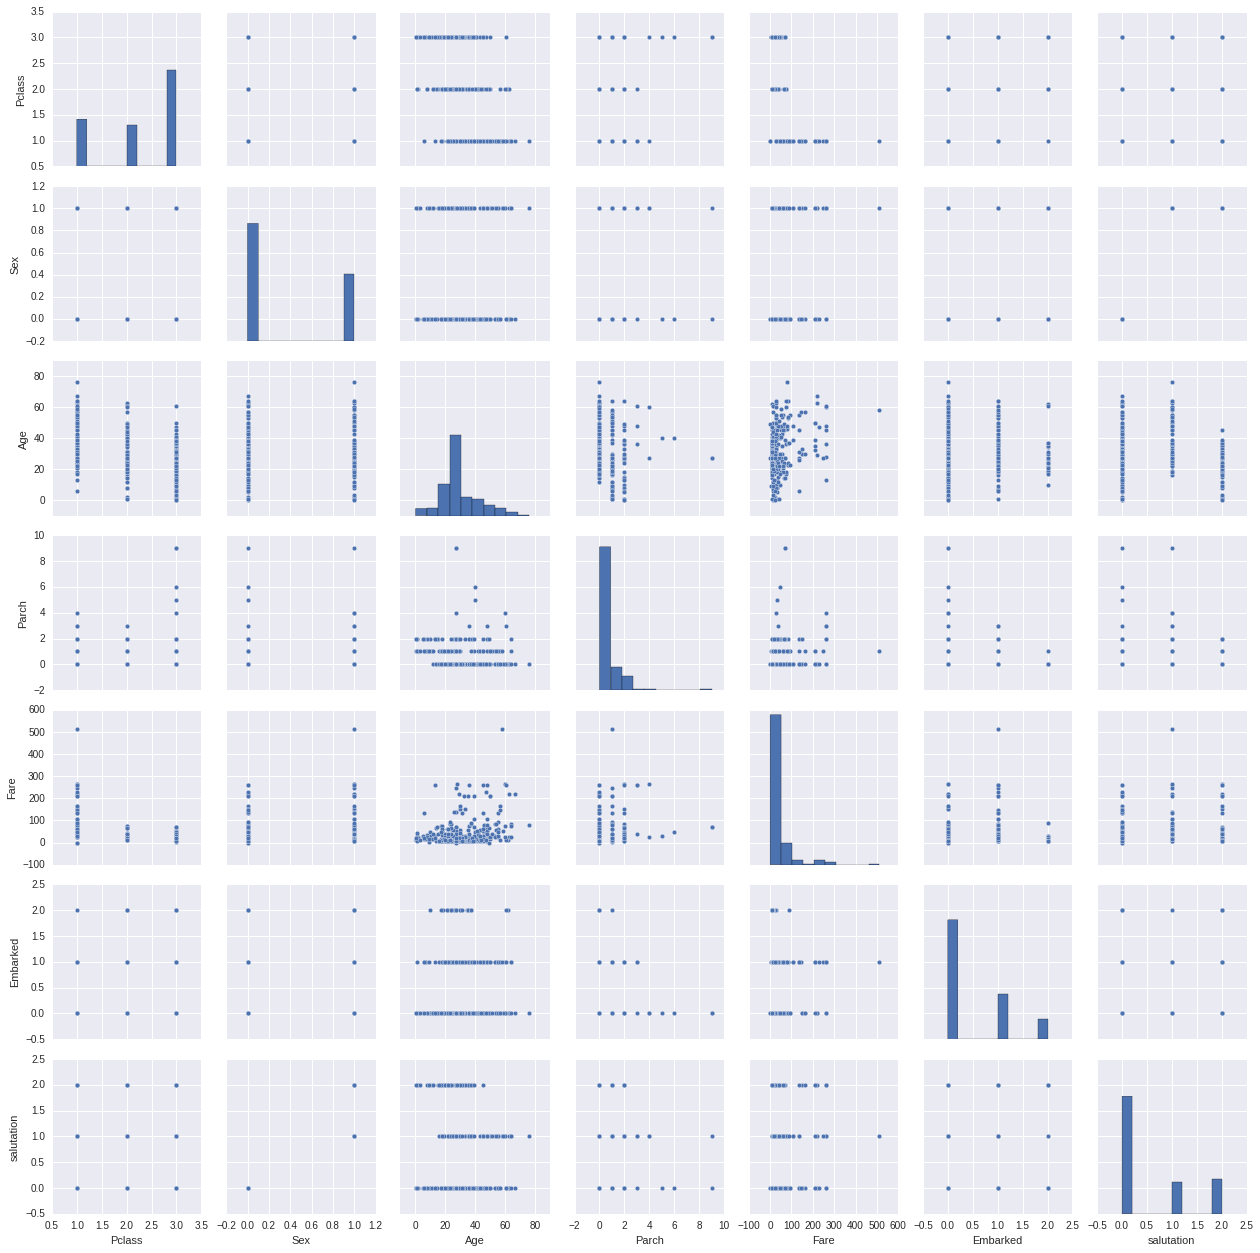

In [67]:
sns.plot(df_test_features)

In [70]:
df_test[df_test['Fare']<5]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,salutation
21,913,3,0,9.0,0,1,3.1708,NaN,0,2,0
266,1158,1,0,27.0,0,0,0.0000,NaN,0,1,0
372,1264,1,0,49.0,0,0,0.0000,B52 B54 B56,0,1,0


In [69]:
df_train_features['Fare'].unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 